In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("spam.csv")

In [3]:
data.head()

,Unnamed: 0,class,message,Unnamed: 3,Unnamed: 4
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,NaN,NaN
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",NaN,NaN
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",NaN,NaN
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",NaN,NaN
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,NaN,NaN


In [4]:
data.columns


Index(['Unnamed: 0', 'class', 'message', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## 1. Data Cleaning

In [5]:
data.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [6]:
data.head()

,class,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [7]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [8]:
data.head()

,class,message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [9]:
# missing values
data.isnull().sum()

class      0
message    0
dtype: int64

In [10]:
#check for duplicate values
data.duplicated().sum()

178

In [11]:
#remove duplicates values
data=data.drop_duplicates(keep='first')

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(4993, 2)

In [14]:
data.head()

,class,message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [15]:
data['class'].value_counts()

0    3531
1    1462
Name: class, dtype: int64

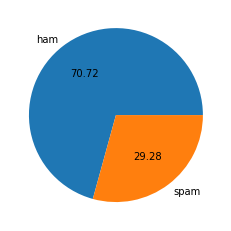

In [16]:
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv=CountVectorizer()

In [19]:
x=data['message']
y=data['class']

In [20]:
x.shape

(4993,)

In [21]:
y.shape

(4993,)

In [22]:
x=cv.fit_transform(x)

In [23]:
x

<4993x50447 sparse matrix of type '<class 'numpy.int64'>'
	with 447953 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [26]:
x_train.shape

(3994, 50447)

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model=MultinomialNB()

In [29]:
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
result=model.score(x_test, y_test)

In [31]:
result=result*100

In [32]:
result

97.8978978978979

In [33]:
import pickle

In [34]:
pickle.dump(model, open("spam.pkl","wb"))

In [35]:
pickle.dump(cv, open("vectorizer.pkl","wb"))

In [36]:
clf=pickle.load(open("spam.pkl","rb"))

In [37]:
clf

MultinomialNB()

In [40]:
msg="Hi you "
data=[msg]
vect=cv.transform(data).toarray()
result=model.predict(vect)
print(result)

[0]
